In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
# Find the uppler and lower layer depth above the sill crest
def Zprof(file, xloc):
    state0 = xr.open_dataset(file)
    state = state0.isel(Y=range(30,39), T=range(24,161)) # Remove the boundary walls in y direction
    depth = state.Z.data
    pt = state.Temp.isel(X = xloc).data # dims = T, Z, Y
    s = state.S.isel(X = xloc).data
    u = state.U.data # dims = T, Z, Y, Xp1

    # Mean value in Y direction, boundaries removed
    pt_tmean = pt.mean(2).mean(0) # Time averaged profiles in z direction
    s_tmean = s.mean(2).mean(0)
    u_ymean = (u[:, :, :, 1:].mean(2) + u[:, :, :, :-1].mean(2)) / 2
    u_tmean = u_ymean[:, :, xloc].mean(0)
    mask = (pt_tmean == 0)
    pt_tmean[mask] = np.nan
    s_tmean[mask] = np.nan
    u_tmean[mask] = np.nan

    return (pt_tmean,s_tmean,u_tmean,depth)

In [3]:
sd = 9 # Sill depth
file1 = '/Users/weiyangbao/Documents/Model_outputs/qf-only-hourly/state_' + str(format(sd,'03d')) + '.nc'
file2 = '/Users/weiyangbao/Documents/Model_outputs/qf-tide-hourly/state_' + str(format(sd,'03d')) + '.nc'
file3 = '/Users/weiyangbao/Documents/Model_outputs/tide006/state_' + str(format(sd,'03d')) + '.nc'
file4 = '/Users/weiyangbao/Documents/Model_outputs/tide01/state_' + str(format(sd,'03d')) + '.nc'
xloc = 30
pt1, s1, u1, dep1 = Zprof(file1, xloc)
pt2, s2, u2, dep2 = Zprof(file2, xloc)
pt3, s3, u3, dep3 = Zprof(file3, xloc)
pt4, s4, u4, dep4 = Zprof(file4, xloc)


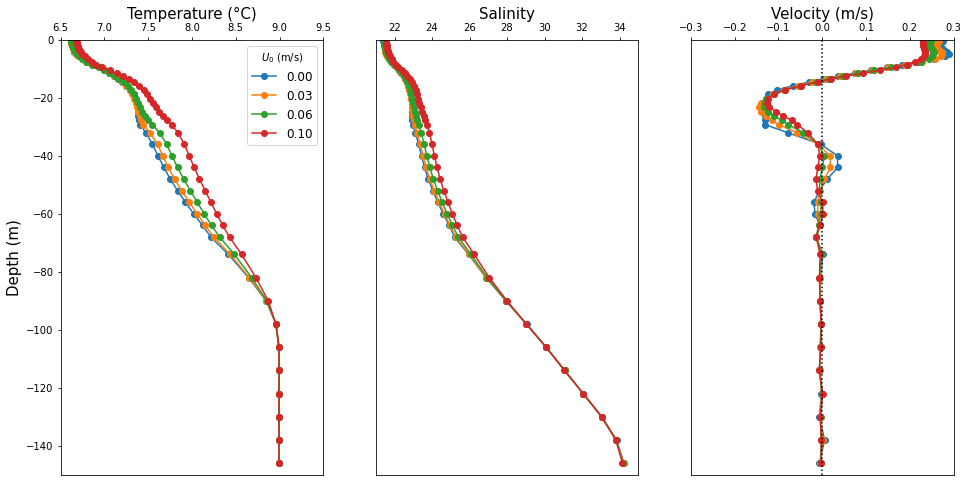

In [6]:
#fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Drag012/TSUprof/"
fig_path = "/Users/weiyangbao/Documents/Results_Figs/TSUprof/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/TSUprof/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# Three-panel plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(16,8))
# Temperature
ax1.plot(pt1,dep1,'o-',label='0.00')
ax1.plot(pt2,dep2,'o-',label='0.03')
ax1.plot(pt3,dep3,'o-',label='0.06')
ax1.plot(pt4,dep4,'o-',label='0.10')
ax1.legend(loc='best', fontsize=12, title=r'$U_0$ (m/s)')
ax1.set_ylabel('Depth (m)',size = 15)
#ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (\N{DEGREE SIGN}C)', size = 15)
ax1.set_xlim([6.5,9.5])
ax1.set_ylim([-150,0])
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity
ax2.plot(s1,dep1,'o-')
ax2.plot(s2,dep2,'o-')
ax2.plot(s3,dep3,'o-')
ax2.plot(s4,dep4,'o-')
ax2.set_xlabel('Salinity', size = 15)
ax2.set_xlim([21,35])
ax2.set_ylim([-150,0])
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks
# Horizontal velocity
ax3.plot(u1,dep1,'o-')
ax3.plot(u2,dep2,'o-')
ax3.plot(u3,dep3,'o-')
ax3.plot(u4,dep4,'o-')
ax3.axvline(x=0,color='k',linestyle=':')
ax3.set_xlabel('Velocity (m/s)', size = 15)
ax3.set_xlim([-0.3,0.3])
ax3.set_ylim([-150,0])
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks


fig.savefig(fig_path + '/sill_mid009.png', dpi = 200, bbox_inches='tight')